In [14]:
import pandas as pd
import numpy as np
import itertools
import warnings
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering, KMeans, OPTICS
import utils

### Prediction on Rating0 differenciated by Match and Emotion on RETOS & BEBRASK using Time Series


In [15]:
data = pd.read_excel("RETOS_BEBRASK_Rating0_Time_Series.xlsx")
data

,Subject ID,Happy_0_0,Happy_0_1,Happy_0_2,Happy_0_3,Happy_0_4,Happy_0_5,Happy_1_0,Happy_1_1,Happy_1_2,...,Fear_0_5,Fear_1_0,Fear_1_1,Fear_1_2,Fear_1_3,Fear_1_4,Fear_1_5,Fear_1_6,Fear_1_7,Fear_1_8
0,PREDWELL_RETOS-1001-1,4,1,1,1,1,1,4,4,4,...,3,4,1,3,2,3,4,3,3,4
1,PREDWELL_RETOS-1002-1,1,1,3,1,1,1,3,4,4,...,1,3,1,3,4,3,4,2,3,4
2,PREDWELL_RETOS-1003-1,1,1,1,1,1,1,3,3,4,...,2,2,2,3,2,2,2,1,3,3
3,PREDWELL_RETOS-1004-1,1,1,3,3,2,1,1,4,2,...,2,2,4,3,1,3,3,2,1,3
4,PREDWELL_RETOS-1005-1,1,1,1,1,2,1,4,3,4,...,1,2,2,2,3,3,3,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,PREDWELL_RETOS-5-1,2,2,1,1,1,1,3,4,4,...,1,1,1,4,2,4,3,3,2,2
145,PREDWELL_RETOS-6-1,1,2,1,1,1,1,3,3,4,...,1,2,2,2,4,2,3,2,4,4
146,PREDWELL_RETOS-7-1,1,1,1,1,1,1,3,4,2,...,4,4,1,2,4,4,1,4,4,1
147,PREDWELL_RETOS-8-1,1,1,1,1,1,1,4,4,1,...,3,3,3,4,3,2,4,2,1,3


In [16]:
scales_BEBRASK = pd.read_excel("../Datasets/RETOS_scales.xlsx")
scales_RETOS = pd.read_excel("../Datasets/BEBRASK_scales.xlsx")
scales = pd.concat([scales_BEBRASK,scales_RETOS])
scales = scales.query("EPRIME_CODE != 'PREDWELL_RETOS-307-1'")
scales

,SUBJECT_CODE,EPRIME_CODE,Gender,Age,PA,NA.,ERQ_CR,ERQ_ES,UPPSP_NU,UPPSP_PU,...,DASS_D,DASS_A,DASS_S,Sex,ZKPQ-N-ANX,ZKPQ-ACT,ZKPQ-SY,ZKPQ-IMPSS,ZKPQ-AGG-HOST,ZKPQ-INFREQ
0,PREDWELL_RETOS_DLPFC20HZ_S001,PREDWELL_RETOS-1-1,M,19,43,23,6.170000,5.75,9,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PREDWELL_RETOS_DLPFC20HZ_S002,PREDWELL_RETOS-2-1,F,22,33,17,5.330000,1,5,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PREDWELL_RETOS_DLPFC20HZ_S003,PREDWELL_RETOS-3-1,F,19,38,15,4.000000,2.25,4,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PREDWELL_RETOS_DLPFC20HZ_S004,PREDWELL_RETOS-4-1,F,21,26,26,5.000000,1.5,5,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PREDWELL_RETOS_DLPFC20HZ_S005,PREDWELL_RETOS-5-1,F,26,28,21,5.330000,4.5,10,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,BEBRASK_LeftVCSHAM50HZ_S024,PREDWELL_RETOS-1124-1,NaN,21,33,20,3.666667,3.75,8,9,...,8.0,14.0,9.0,M,8.0,5.0,0.0,7.0,5.0,2.0
51,BEBRASK_LeftVCSHAM50HZ_S025,PREDWELL_RETOS-1125-1,NaN,20,25,22,3.166667,5.75,4,6,...,9.0,8.0,2.0,F,8.0,6.0,5.0,4.0,8.0,2.0
52,BEBRASK_LeftVCSHAM50HZ_S026,PREDWELL_RETOS-1126-1,NaN,18,45,20,4.000000,4.0,11,12,...,0.0,1.0,0.0,M,7.0,12.0,11.0,15.0,12.0,0.0
53,BEBRASK_LeftVCSHAM50HZ_S027,PREDWELL_RETOS-1127-1,NaN,20,35,19,6.666667,2.5,5,10,...,2.0,3.0,3.0,F,11.0,4.0,15.0,13.0,6.0,0.0


In [17]:
temporal_happy_0 = data[["Subject ID","Happy_0_0","Happy_0_1","Happy_0_2","Happy_0_3","Happy_0_4","Happy_0_5"]]
temporal_happy_1 = data[["Subject ID","Happy_1_0","Happy_1_1","Happy_1_2","Happy_1_3","Happy_1_4","Happy_1_5","Happy_1_6","Happy_1_7","Happy_1_8"]]
temporal_fear_0 = data[["Subject ID","Fear_0_0","Fear_0_1","Fear_0_2","Fear_0_3","Fear_0_4","Fear_0_5"]]
temporal_fear_1 = data[["Subject ID","Fear_1_0","Fear_1_1","Fear_1_2","Fear_1_3","Fear_1_4","Fear_1_5","Fear_1_6","Fear_1_7","Fear_1_8"]]
temporal_sad_0 = data[["Subject ID","Sad_0_0","Sad_0_1","Sad_0_2","Sad_0_3","Sad_0_4","Sad_0_5"]]
temporal_sad_1 = data[["Subject ID","Sad_1_0","Sad_1_1","Sad_1_2","Sad_1_3","Sad_1_4","Sad_1_5","Sad_1_6","Sad_1_7","Sad_1_8"]]

## Hierarchical Clustering using Dynamic Time Warping
#### Happy Match

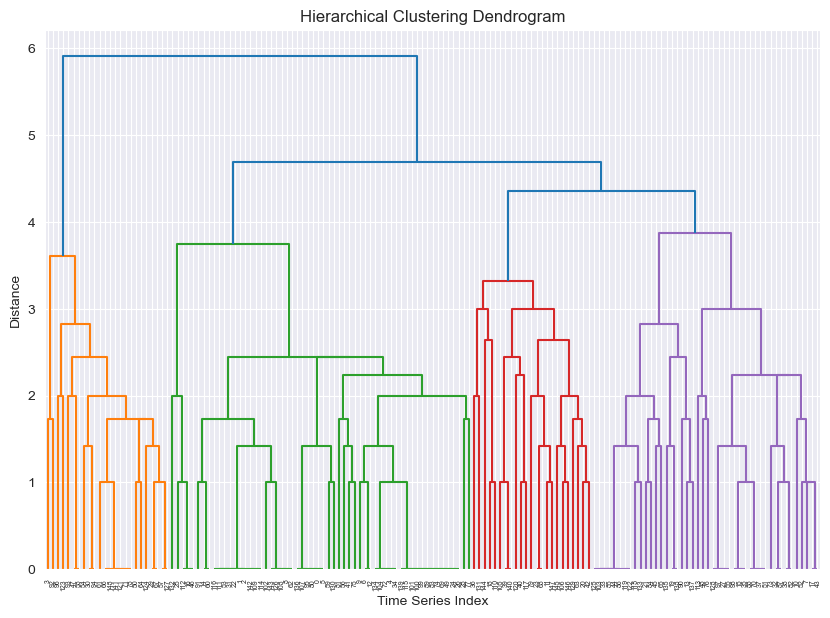

In [18]:
import numpy as np
from dtaidistance import dtw
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import squareform
from matplotlib import pyplot as plt


time_series_data = temporal_happy_1.drop(["Subject ID"], axis=1).to_numpy()
time_series_data = time_series_data.astype(np.float64)
# Convert distance_matrix to float, if it's not already

distance_matrix_happy1 = dtw.distance_matrix_fast(time_series_data)

distance_matrix_happy1 = distance_matrix_happy1.astype(np.float64)

condensed_dist_matrix = squareform(distance_matrix_happy1)
Z = linkage(condensed_dist_matrix, method='complete')

# Step 5: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Time Series Index')
plt.ylabel('Distance')
plt.show()

In [19]:
cluster_data_happy1 =  utils.create_cluster_df(Z,4,temporal_happy_1)
print("Silhouette score:",silhouette_score(data.drop("Subject ID",axis=1),cluster_data_happy1["clusters"],metric="manhattan"))
print("Davies-Bouldin score:",davies_bouldin_score(data.drop("Subject ID",axis=1),cluster_data_happy1["clusters"]))


Silhouette score: 0.007404144429389919
Davies-Bouldin score: 6.016899429795696


C:\Users\manue\PycharmProjects\CASLab\Clustering_Predictive_Processing\utils.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "clusters"] = clusters_happy_match


In [20]:
def create_metrics_cluster_df(df_cluster, df_scales):
    new_data = pd.merge(df_cluster, df_scales, left_on='Subject ID', right_on='EPRIME_CODE')

    filter_df = filter_data(new_data)

    data_clust = {}
    for clust in np.unique(filter_df["clusters"]):
        metric_data = {}
        for column in filter_df.drop(["EPRIME_CODE", "clusters"], axis=1).columns:
            mean_col = filter_df[filter_df["clusters"] == clust][column].mean()
            #std_col = filter_df[filter_df["clusters"] == clust][column].std()
            #max_col = filter_df[filter_df["clusters"] == clust][column].max()
            #min_col = filter_df[filter_df["clusters"] == clust][column].min()

            # Normality Test
            # _, p_value_col = stats.shapiro(result_df[result_df["clusters"]==clust][column])
            metric_data[column] = {'mean': round(mean_col, 2)}#, 'std': round(std_col, 2),
                                   #'max': max_col, 'min': min_col}

        data_clust[clust] = metric_data

    df_clusters = pd.DataFrame()
    for cluster, attributes in data_clust.items():
        for attribute, values in attributes.items():
            for stat, value in values.items():
                col_name = f"{attribute}_{stat}"
                df_clusters.loc[cluster, col_name] = value

    return df_clusters


def filter_data(df,data_type = np.number,na_number = 60):
    numeric_columns = df.select_dtypes(include=[data_type]).columns
    columns_to_select = ['EPRIME_CODE'] + list(numeric_columns)
    
    # Selecting all numeric columns along with "Subject"
    filtered_df = df[columns_to_select]
    cols_to_drop = filtered_df.columns[filtered_df.isnull().sum() >= na_number]
    filtered_df = filtered_df.drop(columns=cols_to_drop).copy()
    return filtered_df.drop("Age", axis=1)

def create_mean_tasks(df,df_cluster):

    copy_data = df.copy()
    copy_data["clusters"] = df_cluster["clusters"]
    
    # Extract cluster labels
    clusters = copy_data['clusters'].unique()
    
    # Create an empty DataFrame to store the mean scores
    df_mean_scores = pd.DataFrame(columns=['Cluster', 'Happy_0', 'Happy_1', 'Sad_0', 'Sad_1', 'Fear_0', 'Fear_1'])
    
    # Iterate over each cluster
    for cluster in clusters:
        # Filter data for the current cluster
        cluster_data = copy_data[copy_data['clusters'] == cluster]
    
        # Calculate mean scores for each category
        df_mean_scores.loc[len(df_mean_scores)] = [
            cluster,
            cluster_data[['Happy_0_' + str(i) for i in range(6)]].mean().mean(),
            cluster_data[['Happy_1_' + str(i) for i in range(9)]].mean().mean(),
            cluster_data[['Sad_0_' + str(i) for i in range(6)]].mean().mean(),
            cluster_data[['Sad_1_' + str(i) for i in range(9)]].mean().mean(),
            cluster_data[['Fear_0_' + str(i) for i in range(6)]].mean().mean(),
            cluster_data[['Fear_1_' + str(i) for i in range(9)]].mean().mean()
        ]
    
    # Display the mean scores for each cluster
    return df_mean_scores

def create_boxplots(df,df_cluster):
    copy_data = df.copy()
    copy_data["clusters"] = df_cluster["clusters"]
    
    # Compute mean for each subject separately for 0 and 1
    copy_data['Happy_No_Match'] = copy_data[['Happy_0_0', 'Happy_0_1', 'Happy_0_2', 'Happy_0_3', 'Happy_0_4', 'Happy_0_5']].mean(axis=1)
    copy_data['Happy_Match'] = copy_data[['Happy_1_0', 'Happy_1_1', 'Happy_1_2', 'Happy_1_3', 'Happy_1_4', 'Happy_1_5', 'Happy_1_6', 'Happy_1_7', 'Happy_1_8']].mean(axis=1)
    
    copy_data['Sad_No_Match'] = copy_data[['Sad_0_0', 'Sad_0_1', 'Sad_0_2', 'Sad_0_3', 'Sad_0_4', 'Sad_0_5']].mean(axis=1)
    copy_data['Sad_Match'] = copy_data[['Sad_1_0', 'Sad_1_1', 'Sad_1_2', 'Sad_1_3', 'Sad_1_4', 'Sad_1_5', 'Sad_1_6', 'Sad_1_7', 'Sad_1_8']].mean(axis=1)
    
    copy_data['Fear_No_Match'] = copy_data[['Fear_0_0', 'Fear_0_1', 'Fear_0_2', 'Fear_0_3', 'Fear_0_4', 'Fear_0_5']].mean(axis=1)
    copy_data['Fear_Match'] = copy_data[['Fear_1_0', 'Fear_1_1', 'Fear_1_2', 'Fear_1_3', 'Fear_1_4', 'Fear_1_5', 'Fear_1_6', 'Fear_1_7', 'Fear_1_8']].mean(axis=1)
    
    # Melt the DataFrame to long format for each emotion
    happy_df = pd.melt(copy_data, id_vars=['clusters'], value_vars=['Happy_No_Match', 'Happy_Match'], 
                         var_name='Happy', value_name='Mean_Score')
    
    sad_df = pd.melt(copy_data, id_vars=['clusters'], value_vars=['Sad_No_Match', 'Sad_Match'], 
                         var_name='Sad', value_name='Mean_Score')
    
    fear_df = pd.melt(copy_data, id_vars=['clusters'], value_vars=['Fear_No_Match', 'Fear_Match'], 
                         var_name='Fear', value_name='Mean_Score')
    
    # Plot boxplots for each emotion separately
    plt.figure(figsize=(18, 6))
    
    plt.subplot(1, 3, 1)
    sns.boxplot(x='Happy', y='Mean_Score', hue='clusters', data=happy_df)
    plt.title('Boxplot of Mean Happy Scores for Each Cluster')
    plt.xlabel('Happy')
    plt.ylabel('Mean Score')
    plt.legend(title='Cluster')
    
    plt.subplot(1, 3, 2)
    sns.boxplot(x='Sad', y='Mean_Score', hue='clusters', data=sad_df)
    plt.title('Boxplot of Mean Sad Scores for Each Cluster')
    plt.xlabel('Sad')
    plt.ylabel('Mean Score')
    plt.legend(title='Cluster')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(x='Fear', y='Mean_Score', hue='clusters', data=fear_df)
    plt.title('Boxplot of Mean Fear Scores for Each Cluster')
    plt.xlabel('Fear')
    plt.ylabel('Mean Score')
    plt.legend(title='Cluster')
    
    plt.tight_layout()
    plt.show()


In [21]:
export_df = cluster_data_happy1.copy()
export_df.columns = ["EPRIME_CODE", "clusters"]
export_df = export_df.sort_values(by='EPRIME_CODE').reset_index(drop=True)
name_excel = f'Clusters_TimeSeries/time_series_predictive_processing_happy_match_clusters.xlsx'
export_df.to_excel(name_excel, index=False)
###### Look Metrics

In [22]:
# Scales Metrics
cluster_metrics_happy1 = create_metrics_cluster_df(cluster_data_happy1,scales)
cluster_metrics_happy1

,PA_mean,NA._mean,ERQ_CR_mean,UPPSP_NU_mean,UPPSP_PU_mean,UPPSP_SS_mean,UPPSP_PSV_mean,BIS_mean,BAS_RR_mean,BAS_D_mean,...,FS_mean,LOT_R_mean,RRQ_Rum_mean,RRQ_Ref_mean,ASI_S_mean,ZKPQ_INFREQ_mean,SPQ_mean,MSSB_POS_mean,MSSB_NEG_mean,MSSB_DES_mean
1,32.46,19.50,4.82,8.50,10.42,9.96,7.42,21.25,17.50,12.08,...,48.12,14.88,3.39,3.39,7.71,1.33,2.33,2.17,1.89,1.83
2,33.62,19.31,4.97,8.29,9.50,11.03,6.88,21.43,17.45,11.76,...,48.10,15.31,3.22,3.36,7.76,1.81,2.07,1.65,1.83,1.67
3,32.74,21.13,5.08,9.35,9.96,10.61,7.35,22.52,17.57,11.70,...,47.48,13.57,3.50,3.36,10.61,1.13,2.70,1.60,2.15,3.25
4,33.43,21.48,4.73,9.64,9.95,11.23,6.91,21.61,17.43,12.00,...,46.14,15.09,3.33,3.36,8.07,1.60,2.08,2.36,1.86,2.72


In [23]:
#Means tasks
create_mean_tasks(data,cluster_data_happy1)


,Cluster,Happy_0,Happy_1,Sad_0,Sad_1,Fear_0,Fear_1
0,2.0,1.229885,3.626437,1.744253,2.888889,1.853448,2.758621
1,1.0,1.236111,3.162037,1.694444,2.541667,1.715278,2.606481
2,4.0,1.204545,3.383838,1.731061,2.729798,1.795455,2.734848
3,3.0,1.166667,3.246377,1.717391,2.782609,1.789855,2.661836


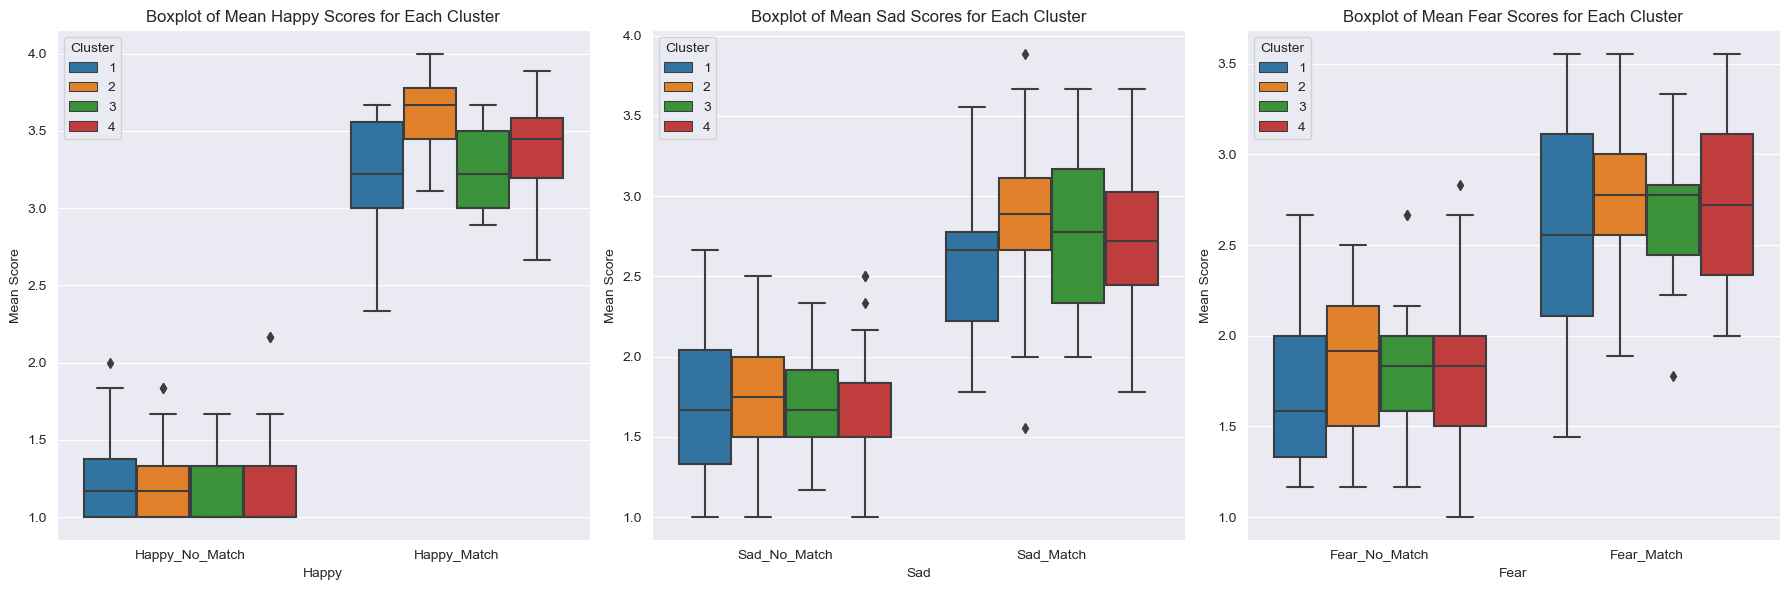

In [24]:
#Boxplots tasks
create_boxplots(data,cluster_data_happy1)

#### Happy Non Match


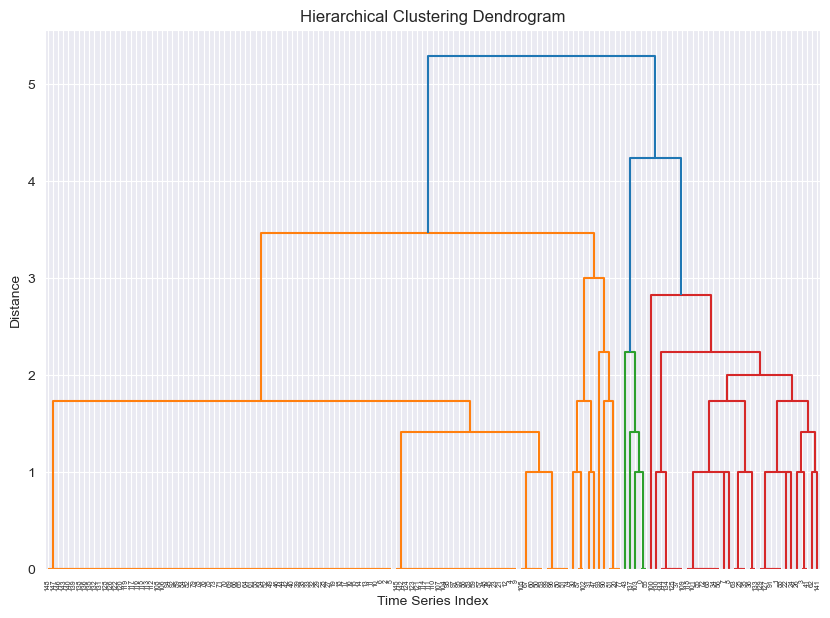

In [25]:
time_series_data = temporal_happy_0.drop(["Subject ID"], axis=1).to_numpy()
time_series_data = time_series_data.astype(np.float64)
# Convert distance_matrix to float, if it's not already

distance_matrix_happy0 = dtw.distance_matrix_fast(time_series_data)

distance_matrix_happy0 = distance_matrix_happy0.astype(np.float64)

condensed_dist_matrix = squareform(distance_matrix_happy0)
Z = linkage(condensed_dist_matrix, method='complete')

# Step 5: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Time Series Index')
plt.ylabel('Distance')
plt.show()


In [26]:
cluster_data_happy0 = utils.create_cluster_df(Z, 3, temporal_happy_0)
print("Silhouette score:",silhouette_score(data.drop("Subject ID",axis=1),cluster_data_happy0["clusters"],metric="manhattan"))
print("Davies-Bouldin score:",davies_bouldin_score(data.drop("Subject ID",axis=1),cluster_data_happy0["clusters"]))


Silhouette score: 0.02044712570646001
Davies-Bouldin score: 6.376322824837078


C:\Users\manue\PycharmProjects\CASLab\Clustering_Predictive_Processing\utils.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "clusters"] = clusters_happy_match


In [27]:
export_df = cluster_data_happy0.copy()
export_df.columns = ["EPRIME_CODE", "clusters"]
export_df = export_df.sort_values(by='EPRIME_CODE').reset_index(drop=True)
name_excel = f'Clusters_TimeSeries/time_series_predictive_processing_happy_non_match_clusters.xlsx'
export_df.to_excel(name_excel, index=False)


In [28]:
# Scales Metrics
cluster_metrics_happy0 = create_metrics_cluster_df(cluster_data_happy0,scales)
cluster_metrics_happy0


,PA_mean,NA._mean,ERQ_CR_mean,UPPSP_NU_mean,UPPSP_PU_mean,UPPSP_SS_mean,UPPSP_PSV_mean,BIS_mean,BAS_RR_mean,BAS_D_mean,...,FS_mean,LOT_R_mean,RRQ_Rum_mean,RRQ_Ref_mean,ASI_S_mean,ZKPQ_INFREQ_mean,SPQ_mean,MSSB_POS_mean,MSSB_NEG_mean,MSSB_DES_mean
1,33.90,19.68,4.96,8.67,9.68,10.89,7.12,21.36,17.62,11.96,...,47.72,15.21,3.28,3.40,7.78,1.52,2.09,1.90,1.85,1.99
2,35.20,21.60,5.00,8.80,9.20,11.20,5.00,21.80,18.20,13.20,...,48.20,13.40,3.25,3.40,10.80,1.33,2.33,3.67,2.00,2.33
3,30.73,22.00,4.66,9.64,10.52,10.67,7.12,22.48,16.85,11.36,...,46.33,14.12,3.46,3.26,9.58,1.70,2.68,1.84,2.08,3.32


In [29]:
#Means tasks
create_mean_tasks(data,cluster_data_happy0)


,Cluster,Happy_0,Happy_1,Sad_0,Sad_1,Fear_0,Fear_1
0,2.0,1.633333,3.577778,1.966667,3.066667,2.100000,2.977778
1,3.0,1.444444,3.457912,1.772727,2.777778,1.868687,2.801347
2,1.0,1.126126,3.403403,1.704204,2.753754,1.771772,2.673674


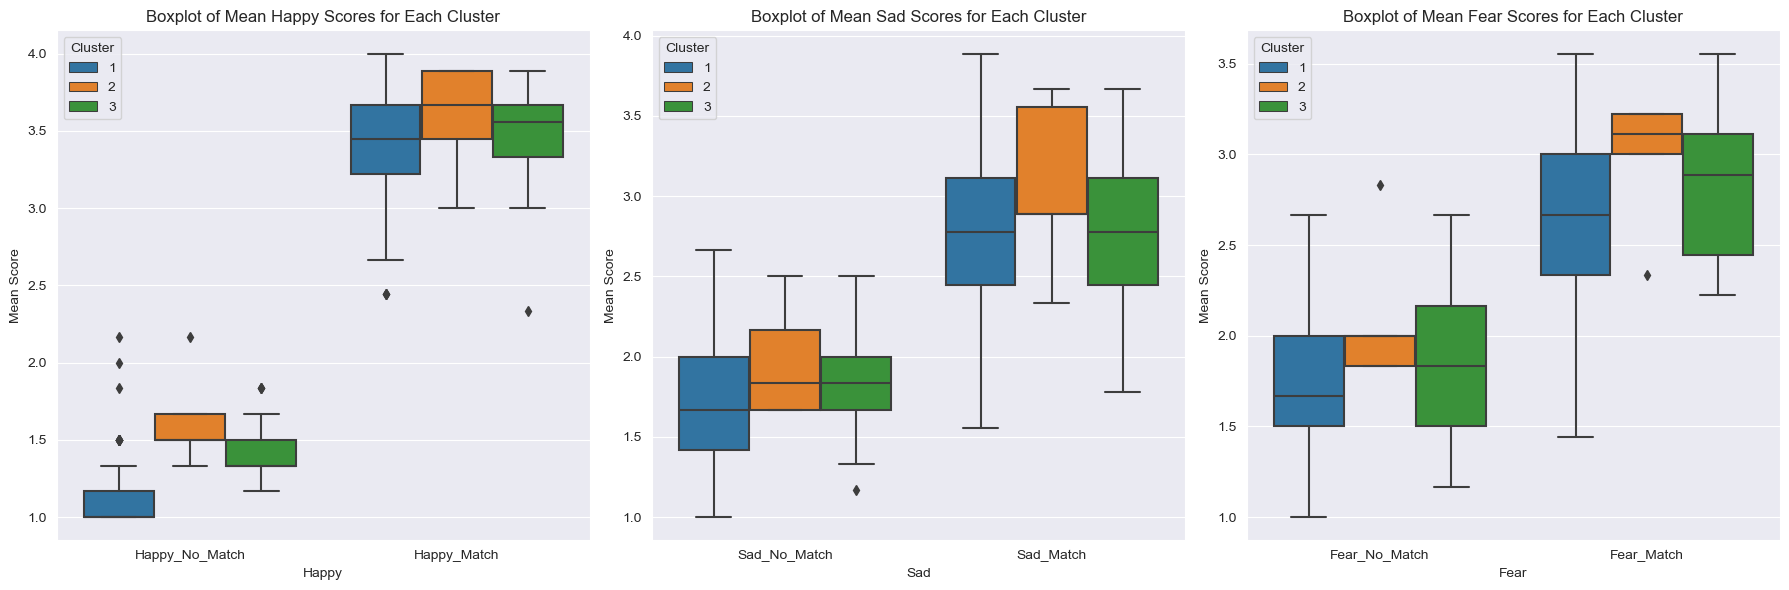

In [30]:
#Boxplots tasks
create_boxplots(data,cluster_data_happy0)


#### Fear Match

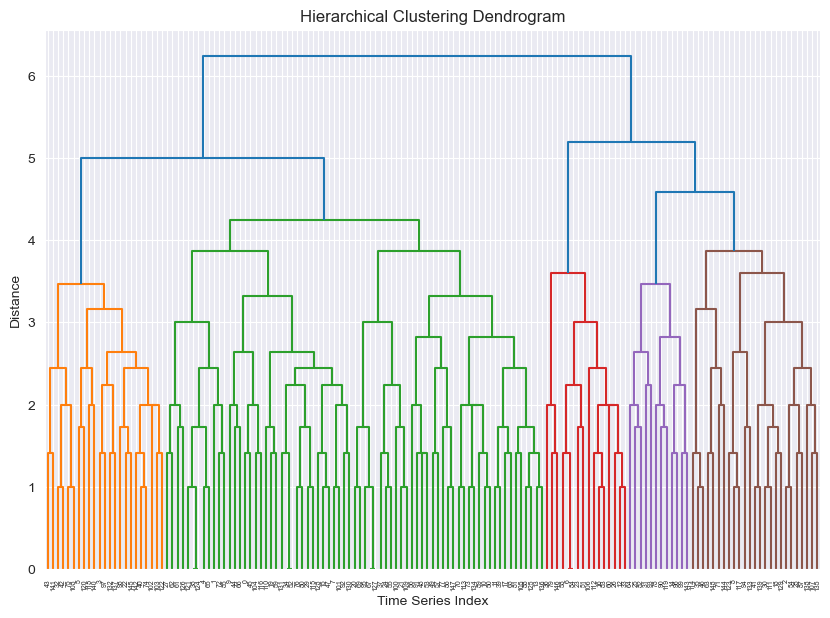

In [31]:
time_series_data = temporal_fear_1.drop(["Subject ID"], axis=1).to_numpy()
time_series_data = time_series_data.astype(np.float64)
# Convert distance_matrix to float, if it's not already

distance_matrix_fear1 = dtw.distance_matrix_fast(time_series_data)

distance_matrix_fear1 = distance_matrix_fear1.astype(np.float64)


condensed_dist_matrix = squareform(distance_matrix_fear1)
Z = linkage(condensed_dist_matrix, method='complete')

# Step 5: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Time Series Index')
plt.ylabel('Distance')
plt.show()
#### Fear No Match

In [32]:
cluster_data_fear1 = utils.create_cluster_df(Z, 5, temporal_fear_1)
print("Silhouette score:",silhouette_score(data.drop("Subject ID",axis=1),cluster_data_fear1["clusters"],metric="manhattan"))
print("Davies-Bouldin score:",davies_bouldin_score(data.drop("Subject ID",axis=1),cluster_data_fear1["clusters"]))


Silhouette score: 0.0072837152120460895
Davies-Bouldin score: 4.851453784363998


C:\Users\manue\PycharmProjects\CASLab\Clustering_Predictive_Processing\utils.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "clusters"] = clusters_happy_match


In [33]:
export_df = cluster_data_fear1.copy()
export_df.columns = ["EPRIME_CODE", "clusters"]
export_df = export_df.sort_values(by='EPRIME_CODE').reset_index(drop=True)
name_excel = f'Clusters_TimeSeries/time_series_predictive_processing_fear_match_clusters.xlsx'
export_df.to_excel(name_excel, index=False)


In [34]:
# Scales Metrics
cluster_metrics_fear1 = create_metrics_cluster_df(cluster_data_fear1,scales)
cluster_metrics_fear1


,PA_mean,NA._mean,ERQ_CR_mean,UPPSP_NU_mean,UPPSP_PU_mean,UPPSP_SS_mean,UPPSP_PSV_mean,BIS_mean,BAS_RR_mean,BAS_D_mean,...,FS_mean,LOT_R_mean,RRQ_Rum_mean,RRQ_Ref_mean,ASI_S_mean,ZKPQ_INFREQ_mean,SPQ_mean,MSSB_POS_mean,MSSB_NEG_mean,MSSB_DES_mean
1,35.30,20.87,5.02,8.91,10.22,12.17,6.65,21.57,17.78,12.48,...,47.87,15.91,3.20,3.57,8.43,2.00,2.22,1.89,1.56,1.67
2,33.22,20.25,4.92,8.89,9.84,10.78,7.08,21.38,17.34,11.64,...,47.53,15.07,3.40,3.35,8.00,1.49,1.93,1.76,1.69,1.95
3,33.19,21.38,4.91,8.06,9.06,10.38,7.12,22.62,17.00,11.81,...,46.56,13.69,3.45,3.36,9.88,1.00,3.07,1.71,2.93,2.07
4,31.00,20.08,4.64,9.25,9.83,9.25,7.50,21.42,17.50,11.17,...,48.33,15.58,3.15,3.53,6.92,1.33,2.18,2.36,1.18,2.82
5,32.52,19.12,4.83,9.20,10.08,10.92,7.04,21.84,17.84,12.36,...,46.84,13.96,3.21,3.16,8.60,1.69,2.47,2.42,2.53,3.68


In [35]:
#Means tasks
create_mean_tasks(data,cluster_data_fear1)


,Cluster,Happy_0,Happy_1,Sad_0,Sad_1,Fear_0,Fear_1
0,2.0,1.203196,3.453577,1.778539,2.858447,1.764840,2.911720
1,5.0,1.220000,3.311111,1.553333,2.680000,1.820000,2.275556
2,1.0,1.260870,3.483092,1.731884,2.748792,1.971014,2.705314
3,3.0,1.145833,3.465278,1.708333,2.881944,1.802083,2.916667
4,4.0,1.263889,3.277778,1.805556,2.305556,1.694444,2.148148


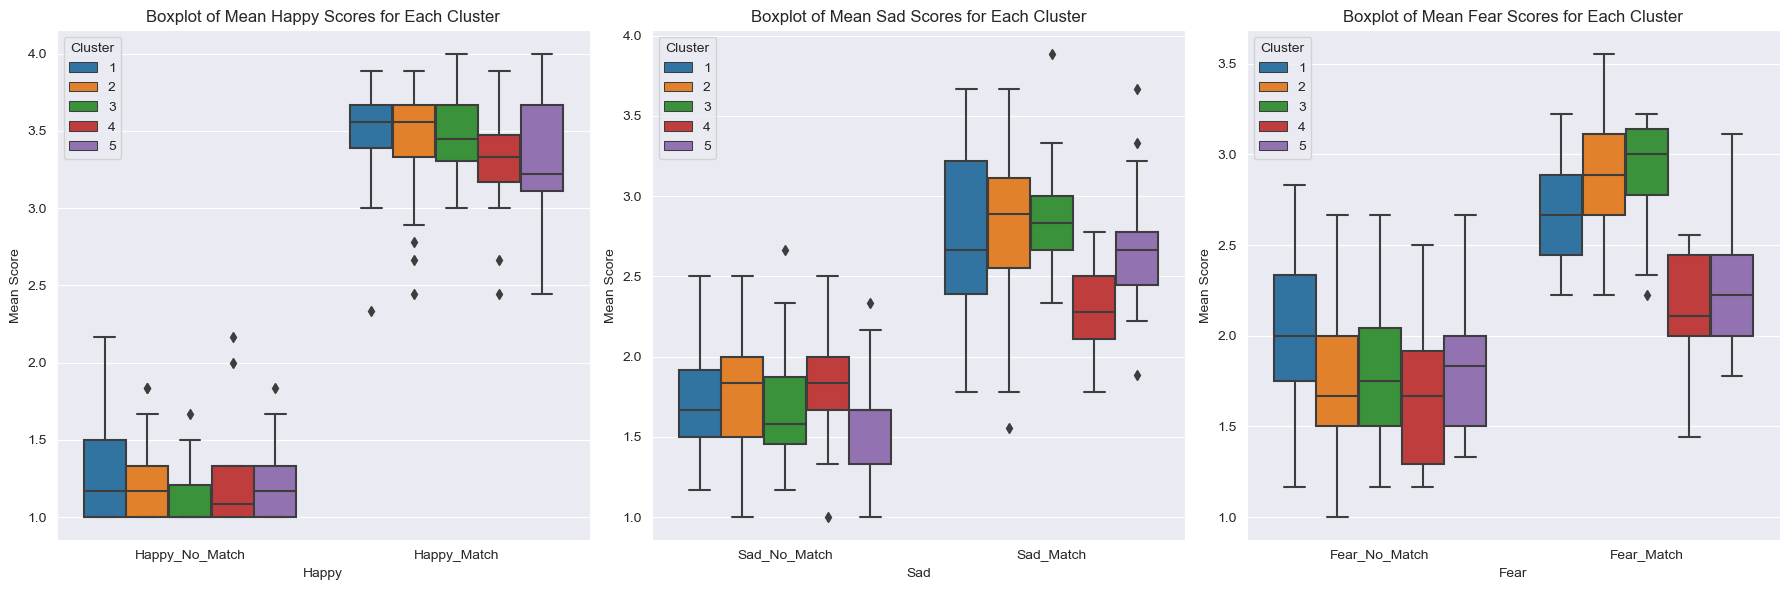

In [36]:
#Boxplots tasks
create_boxplots(data,cluster_data_fear1)

#### Fear No Match

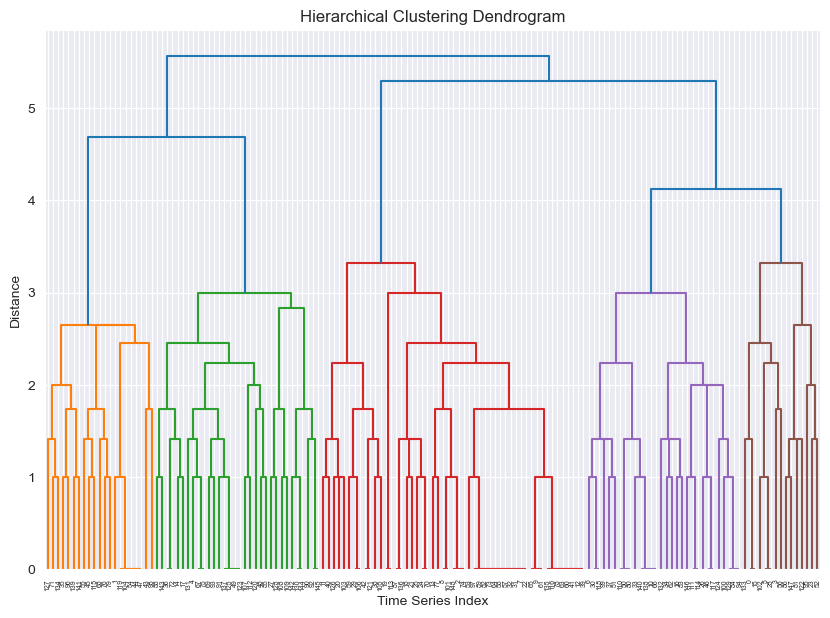

In [37]:
time_series_data = temporal_fear_0.drop(["Subject ID"], axis=1).to_numpy()
time_series_data = time_series_data.astype(np.float64)
# Convert distance_matrix to float, if it's not already

distance_matrix_fear0 = dtw.distance_matrix_fast(time_series_data)

distance_matrix_fear0 = distance_matrix_fear0.astype(np.float64)

condensed_dist_matrix = squareform(distance_matrix_fear0)
Z = linkage(condensed_dist_matrix, method='complete')

# Step 5: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Time Series Index')
plt.ylabel('Distance')
plt.show()


In [38]:
cluster_data_fear0 = utils.create_cluster_df(Z, 5, temporal_fear_0)
print("Silhouette score:",silhouette_score(data.drop("Subject ID",axis=1),cluster_data_fear0["clusters"],metric="manhattan"))
print("Davies-Bouldin score:",davies_bouldin_score(data.drop("Subject ID",axis=1),cluster_data_fear0["clusters"]))

#### Fear No Match

Silhouette score: 0.01617464300874908
Davies-Bouldin score: 4.520371634105031


C:\Users\manue\PycharmProjects\CASLab\Clustering_Predictive_Processing\utils.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "clusters"] = clusters_happy_match


In [39]:
export_df = cluster_data_fear0.copy()
export_df.columns = ["EPRIME_CODE", "clusters"]
export_df = export_df.sort_values(by='EPRIME_CODE').reset_index(drop=True)
name_excel = f'Clusters_TimeSeries/time_series_predictive_processing_fear_non_match_clusters.xlsx'
export_df.to_excel(name_excel, index=False)

In [40]:
# Scales Metrics
cluster_metrics_fear0 = create_metrics_cluster_df(cluster_data_fear0,scales)
cluster_metrics_fear0


,PA_mean,NA._mean,ERQ_CR_mean,UPPSP_NU_mean,UPPSP_PU_mean,UPPSP_SS_mean,UPPSP_PSV_mean,BIS_mean,BAS_RR_mean,BAS_D_mean,...,FS_mean,LOT_R_mean,RRQ_Rum_mean,RRQ_Ref_mean,ASI_S_mean,ZKPQ_INFREQ_mean,SPQ_mean,MSSB_POS_mean,MSSB_NEG_mean,MSSB_DES_mean
1,34.95,20.57,5.06,9.95,10.29,10.43,6.24,21.05,17.43,12.29,...,47.57,16.19,3.32,3.66,8.67,2.21,2.06,1.94,1.88,1.62
2,33.19,19.59,4.93,8.84,9.75,10.53,7.28,22.03,17.62,12.16,...,47.88,16.03,3.42,3.49,6.56,1.20,2.23,2.45,1.45,2.77
3,31.57,20.20,4.92,9.02,10.22,11.29,7.10,22.08,17.35,11.41,...,47.18,13.59,3.39,3.14,9.02,1.32,2.07,1.95,2.11,2.11
4,33.70,20.13,4.71,8.60,9.17,10.57,7.33,21.10,17.63,12.03,...,46.63,14.93,3.14,3.33,8.03,1.79,2.58,1.71,2.42,2.42
5,35.73,21.73,4.87,7.60,9.60,11.20,6.93,21.07,17.27,11.93,...,48.73,15.13,3.23,3.53,9.40,1.75,2.21,1.43,1.07,2.50


In [41]:
#Means tasks
create_mean_tasks(data,cluster_data_fear0)


,Cluster,Happy_0,Happy_1,Sad_0,Sad_1,Fear_0,Fear_1
0,5.0,1.244444,3.437037,1.777778,2.674074,2.311111,2.903704
1,1.0,1.269841,3.354497,1.738095,2.899471,2.039683,2.714286
2,3.0,1.160131,3.435730,1.653595,2.642702,1.444444,2.636166
3,2.0,1.229167,3.378472,1.822917,2.871528,1.901042,2.722222
4,4.0,1.233333,3.481481,1.722222,2.833333,1.894444,2.733333


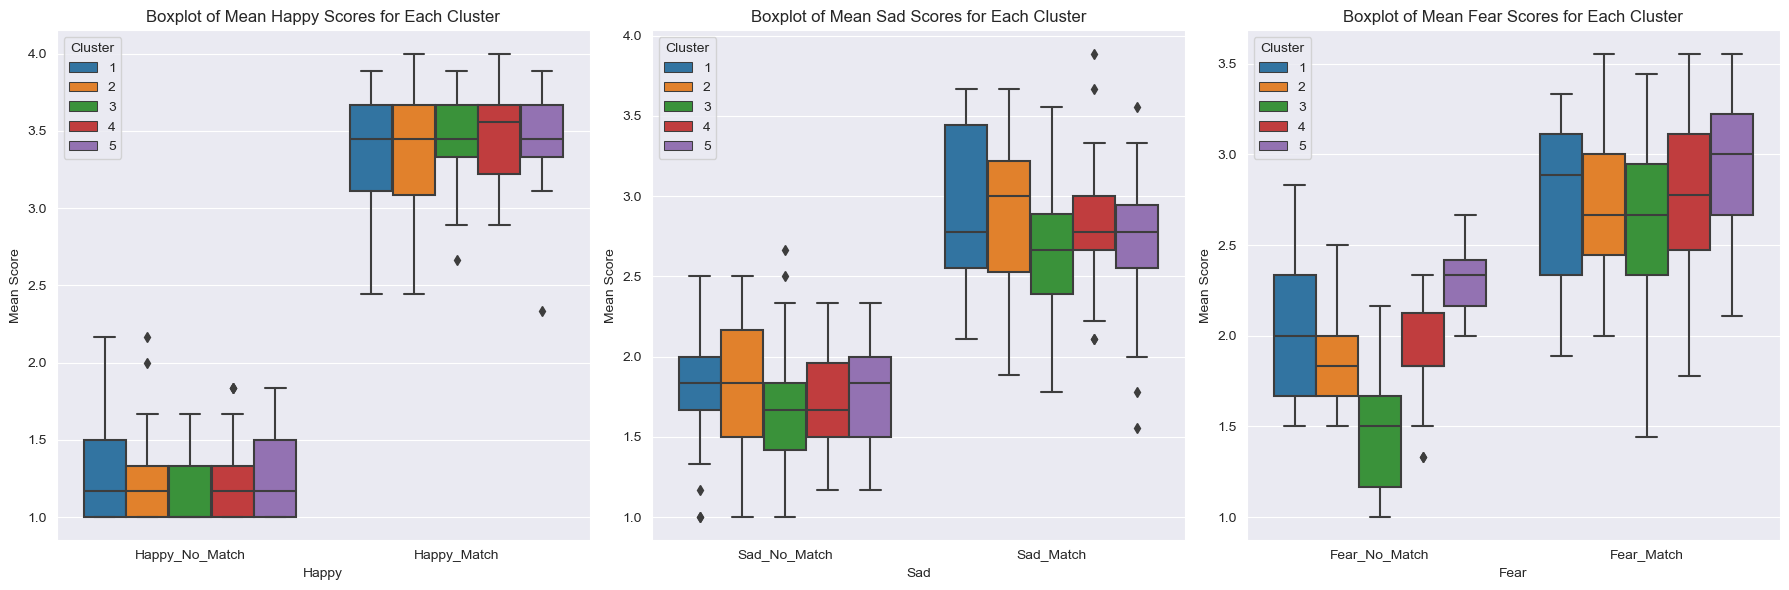

In [42]:
#Boxplots tasks
create_boxplots(data,cluster_data_fear0)


#### Sad Match

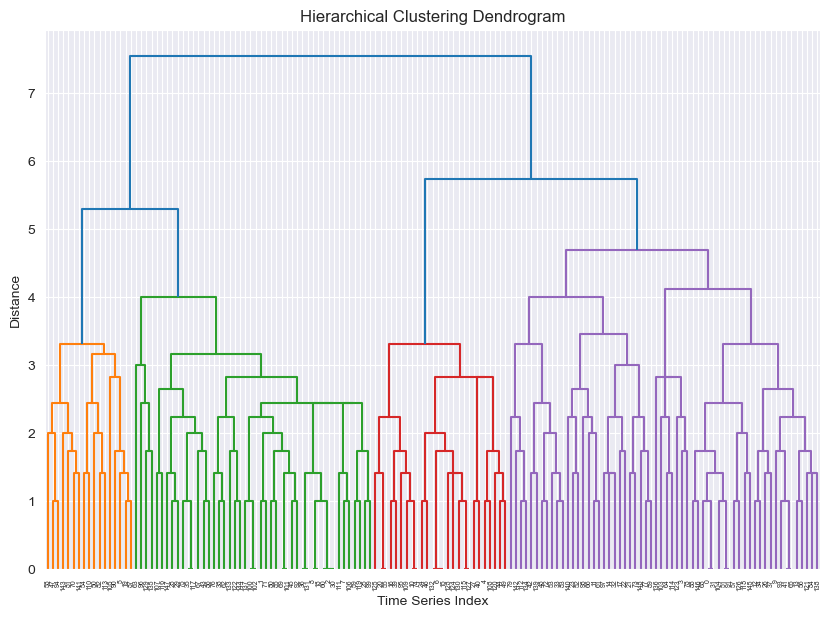

In [43]:
time_series_data = temporal_sad_1.drop(["Subject ID"], axis=1).to_numpy()
time_series_data = time_series_data.astype(np.float64)
# Convert distance_matrix to float, if it's not already

distance_matrix_sad1 = dtw.distance_matrix_fast(time_series_data)

distance_matrix_sad1 = distance_matrix_sad1.astype(np.float64)

condensed_dist_matrix = squareform(distance_matrix_sad1)
Z = linkage(condensed_dist_matrix, method='complete')

# Step 5: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Time Series Index')
plt.ylabel('Distance')
plt.show()

In [44]:
cluster_data_sad1 = utils.create_cluster_df(Z, 4, temporal_sad_1)
print("Silhouette score:",silhouette_score(data.drop("Subject ID",axis=1),cluster_data_sad1["clusters"],metric="manhattan"))
print("Davies-Bouldin score:",davies_bouldin_score(data.drop("Subject ID",axis=1),cluster_data_sad1["clusters"]))



Silhouette score: 0.010311368790236293
Davies-Bouldin score: 4.914281209295374


C:\Users\manue\PycharmProjects\CASLab\Clustering_Predictive_Processing\utils.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "clusters"] = clusters_happy_match


In [45]:
export_df = cluster_data_sad1.copy()
export_df.columns = ["EPRIME_CODE", "clusters"]
export_df = export_df.sort_values(by='EPRIME_CODE').reset_index(drop=True)
name_excel = f'Clusters_TimeSeries/time_series_predictive_processing_sad_match_clusters.xlsx'
export_df.to_excel(name_excel, index=False)


In [46]:
# Scales Metrics
cluster_metrics_sad1 = create_metrics_cluster_df(cluster_data_sad1,scales)
cluster_metrics_sad1


,PA_mean,NA._mean,ERQ_CR_mean,UPPSP_NU_mean,UPPSP_PU_mean,UPPSP_SS_mean,UPPSP_PSV_mean,BIS_mean,BAS_RR_mean,BAS_D_mean,...,FS_mean,LOT_R_mean,RRQ_Rum_mean,RRQ_Ref_mean,ASI_S_mean,ZKPQ_INFREQ_mean,SPQ_mean,MSSB_POS_mean,MSSB_NEG_mean,MSSB_DES_mean
1,31.35,21.65,4.64,9.24,9.18,10.59,7.47,21.82,17.53,12.06,...,47.24,14.12,3.44,3.30,9.00,1.50,2.46,3.08,1.69,2.38
2,31.76,20.17,4.90,9.65,10.20,10.57,7.37,21.93,17.33,11.59,...,46.74,14.46,3.38,3.33,8.20,1.34,1.90,1.64,2.46,2.82
3,36.50,19.77,4.97,8.46,9.69,12.15,6.04,21.15,17.50,12.35,...,49.08,16.58,3.14,3.30,7.54,1.62,2.26,2.47,1.74,2.05
4,33.50,20.15,4.93,8.38,9.85,10.58,7.12,21.53,17.55,11.83,...,47.30,14.75,3.32,3.44,8.47,1.73,2.39,1.65,1.57,1.90


In [47]:
#Means tasks
create_mean_tasks(data,cluster_data_sad1)


,Cluster,Happy_0,Happy_1,Sad_0,Sad_1,Fear_0,Fear_1
0,4.0,1.191667,3.401852,1.672222,2.661111,1.708333,2.714815
1,2.0,1.271739,3.388889,1.721014,2.756039,1.898551,2.637681
2,3.0,1.134615,3.641026,1.884615,3.410256,1.955128,2.957265
3,1.0,1.254902,3.241830,1.705882,2.209150,1.656863,2.529412


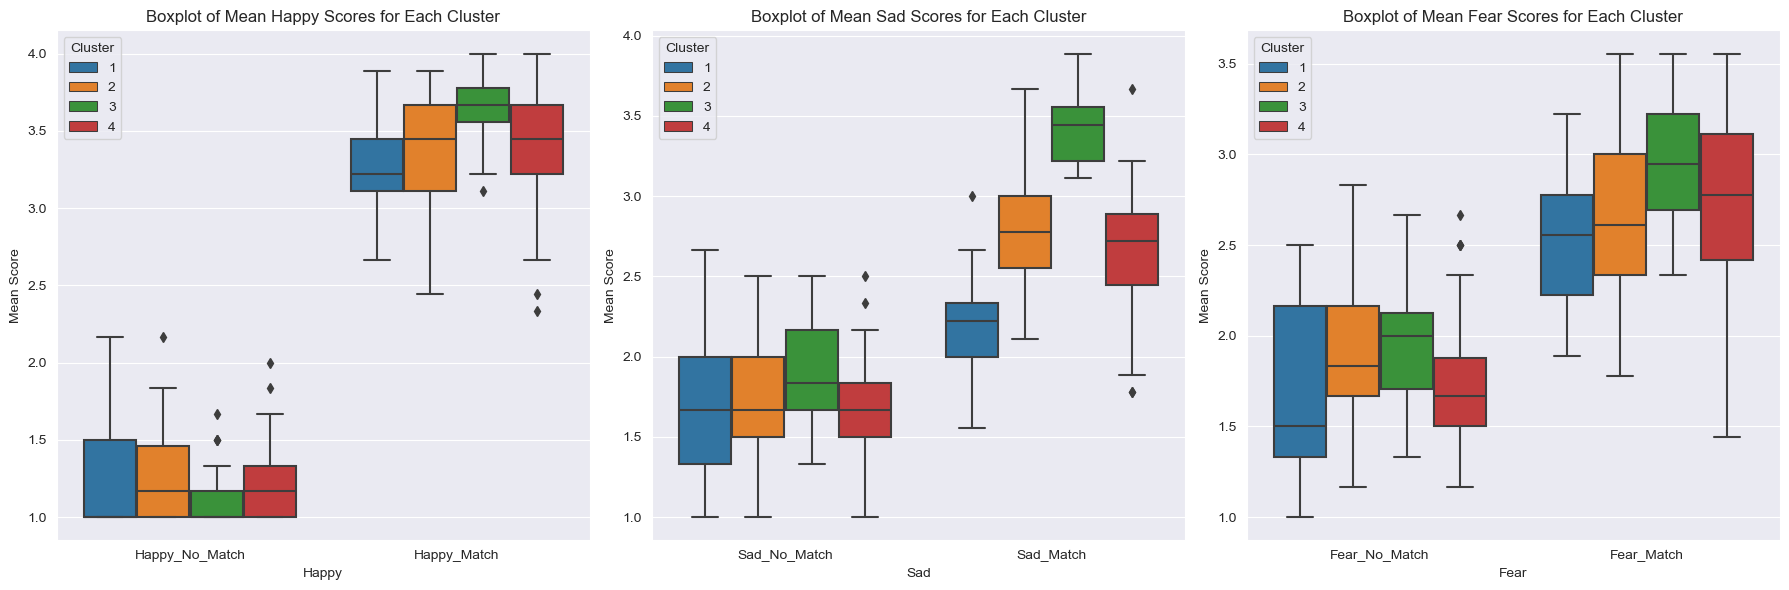

In [48]:
#Boxplots tasks
create_boxplots(data,cluster_data_sad1)


#### Sad No Match

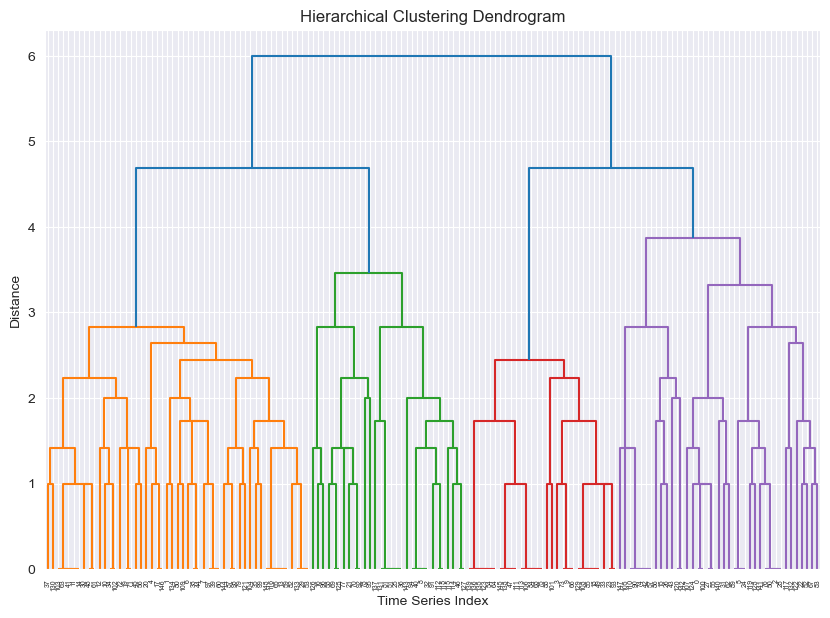

In [49]:
time_series_data = temporal_sad_0.drop(["Subject ID"], axis=1).to_numpy()
time_series_data = time_series_data.astype(np.float64)
# Convert distance_matrix to float, if it's not already

distance_matrix_sad0 = dtw.distance_matrix_fast(time_series_data)

distance_matrix_sad0 = distance_matrix_sad0.astype(np.float64)

condensed_dist_matrix = squareform(distance_matrix_sad0)
Z = linkage(condensed_dist_matrix, method='complete')

# Step 5: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Time Series Index')
plt.ylabel('Distance')
plt.show()


In [50]:
cluster_data_sad0 = utils.create_cluster_df(Z, 4, temporal_sad_0)
print("Silhouette score:",silhouette_score(data.drop("Subject ID",axis=1),cluster_data_sad0["clusters"],metric="manhattan"))
print("Davies-Bouldin score:",davies_bouldin_score(data.drop("Subject ID",axis=1),cluster_data_sad0["clusters"]))



Silhouette score: 0.007553423205880923
Davies-Bouldin score: 4.9131225857099


C:\Users\manue\PycharmProjects\CASLab\Clustering_Predictive_Processing\utils.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "clusters"] = clusters_happy_match


In [51]:
export_df = cluster_data_sad0.copy()
export_df.columns = ["EPRIME_CODE", "clusters"]
export_df = export_df.sort_values(by='EPRIME_CODE').reset_index(drop=True)
name_excel = f'Clusters_TimeSeries/time_series_predictive_processing_sad_non_match_clusters.xlsx'
export_df.to_excel(name_excel, index=False)


In [52]:
# Scales Metrics
cluster_metrics_sad0 = create_metrics_cluster_df(cluster_data_sad0,scales)
cluster_metrics_sad0


,PA_mean,NA._mean,ERQ_CR_mean,UPPSP_NU_mean,UPPSP_PU_mean,UPPSP_SS_mean,UPPSP_PSV_mean,BIS_mean,BAS_RR_mean,BAS_D_mean,...,FS_mean,LOT_R_mean,RRQ_Rum_mean,RRQ_Ref_mean,ASI_S_mean,ZKPQ_INFREQ_mean,SPQ_mean,MSSB_POS_mean,MSSB_NEG_mean,MSSB_DES_mean
1,33.06,20.51,4.94,8.53,10.20,11.14,7.33,21.25,17.45,11.69,...,46.69,14.76,3.35,3.27,8.16,1.48,1.94,2.00,2.12,2.58
2,31.23,19.83,5.05,8.70,9.93,10.30,7.07,21.83,16.90,11.53,...,46.50,14.90,3.35,3.49,7.63,1.62,2.95,2.40,2.75,2.50
3,31.86,20.45,4.80,9.48,9.86,11.10,6.93,22.45,17.59,11.97,...,47.31,14.72,3.52,3.27,9.31,1.81,2.32,1.68,1.36,2.05
4,36.05,20.13,4.77,9.05,9.33,10.72,6.74,21.33,17.85,12.31,...,49.21,15.23,3.11,3.48,8.18,1.36,2.10,1.70,1.37,1.80


In [53]:
#Means tasks
create_mean_tasks(data,cluster_data_sad0)


,Cluster,Happy_0,Happy_1,Sad_0,Sad_1,Fear_0,Fear_1
0,4.0,1.264957,3.524217,1.811966,2.840456,1.982906,2.760684
1,1.0,1.215686,3.418301,1.764706,2.825708,1.754902,2.742919
2,3.0,1.189655,3.268199,1.339080,2.574713,1.632184,2.513410
3,2.0,1.166667,3.440741,1.933333,2.770370,1.822222,2.788889


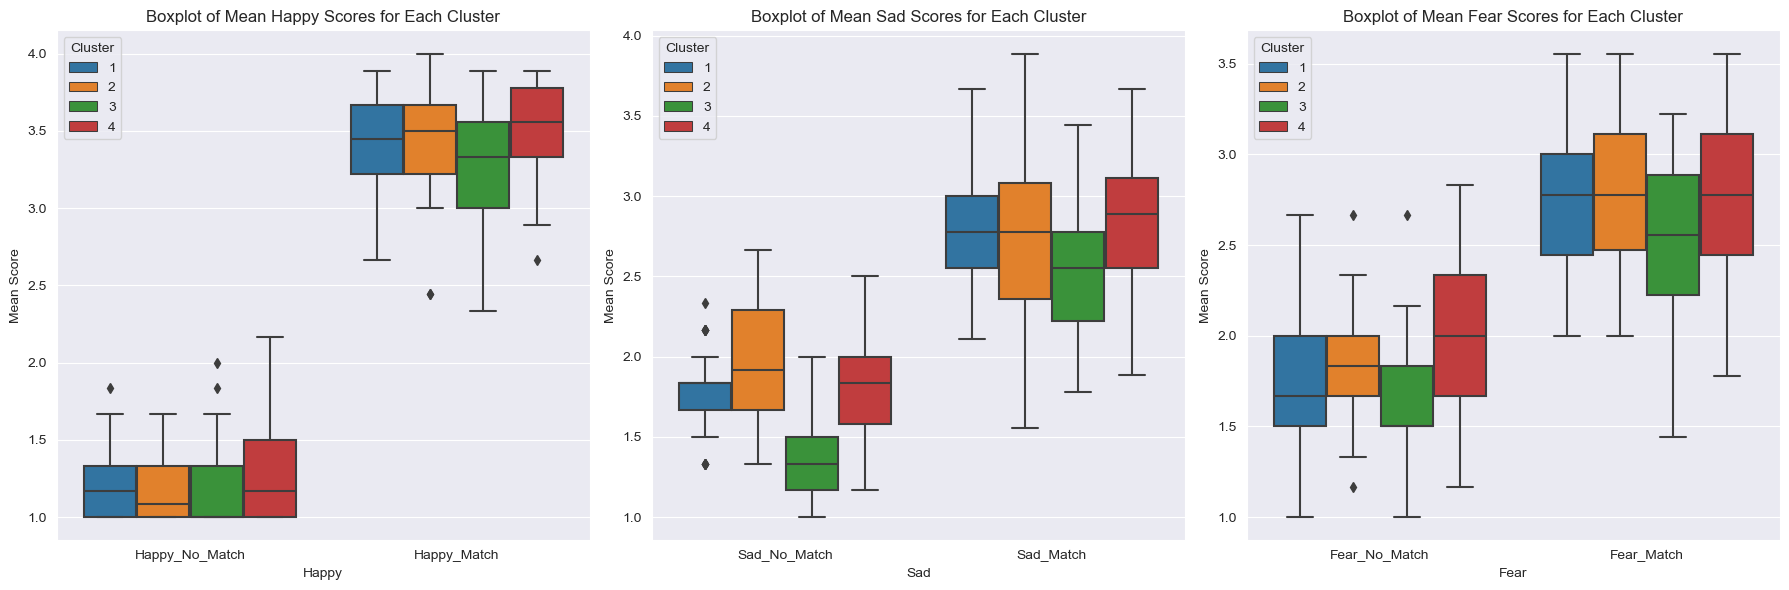

In [54]:
#Boxplots tasks
create_boxplots(data,cluster_data_sad0)


## Cluster averaged sum of distances

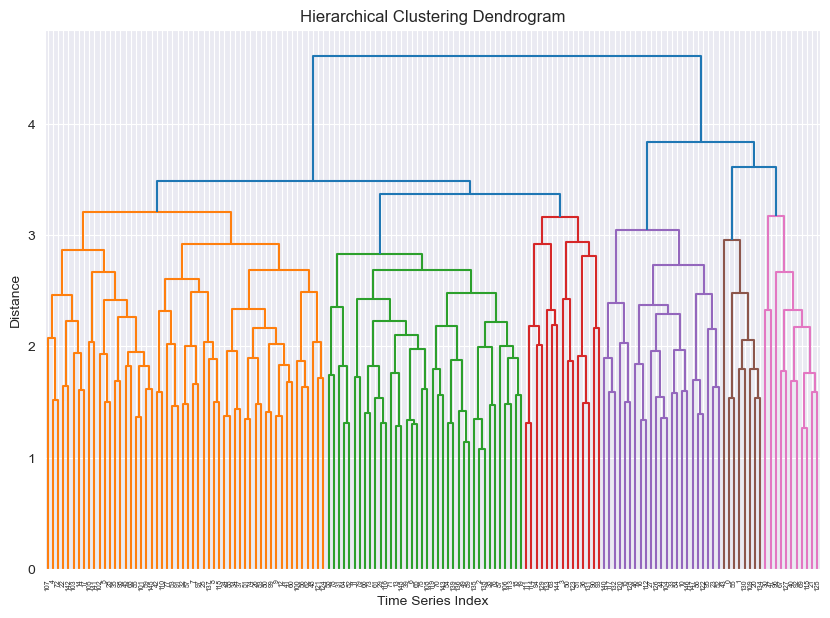

In [55]:
average_distance_matrix = (distance_matrix_fear1+distance_matrix_fear0+distance_matrix_happy0+distance_matrix_happy1+distance_matrix_sad0+distance_matrix_sad1)/6
condensed_dist_matrix = squareform(average_distance_matrix)
Z = linkage(condensed_dist_matrix, method='complete')

# Step 5: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Time Series Index')
plt.ylabel('Distance')
plt.show()


In [56]:
cluster_data_average = utils.create_cluster_df(Z, 6, data)
print("Silhouette score:",silhouette_score(data.drop("Subject ID",axis=1),cluster_data_average["clusters"],metric="manhattan"))
print("Davies-Bouldin score:",davies_bouldin_score(data.drop("Subject ID",axis=1),cluster_data_average["clusters"]))


Silhouette score: -0.03298049690416892
Davies-Bouldin score: 10.380101496271054


In [57]:
export_df = cluster_data_average.copy()
export_df.columns = ["EPRIME_CODE", "clusters"]
export_df = export_df.sort_values(by='EPRIME_CODE').reset_index(drop=True)
name_excel = f'Clusters_TimeSeries/time_series_predictive_processing_all_emotions_clusters.xlsx'
export_df.to_excel(name_excel, index=False)


In [58]:
# Scales Metrics
cluster_metrics_average = create_metrics_cluster_df(cluster_data_average,scales)
cluster_metrics_average["length_cluster"] = np.unique(cluster_data_average["clusters"],return_counts=True)[1]
cluster_metrics_average.insert(0, 'length_cluster', cluster_metrics_average.pop('length_cluster'))
cluster_metrics_average

,length_cluster,PA_mean,NA._mean,ERQ_CR_mean,UPPSP_NU_mean,UPPSP_PU_mean,UPPSP_SS_mean,UPPSP_PSV_mean,BIS_mean,BAS_RR_mean,...,FS_mean,LOT_R_mean,RRQ_Rum_mean,RRQ_Ref_mean,ASI_S_mean,ZKPQ_INFREQ_mean,SPQ_mean,MSSB_POS_mean,MSSB_NEG_mean,MSSB_DES_mean
1,54,31.94,19.89,4.86,8.87,9.76,11.13,7.19,21.26,16.80,...,46.31,14.70,3.35,3.38,7.76,1.55,2.46,1.73,1.94,2.33
2,38,32.76,18.68,4.87,8.74,9.76,11.05,7.34,21.63,17.84,...,47.89,15.26,3.25,3.32,7.55,1.54,1.70,1.93,1.70,1.70
3,15,30.93,21.20,4.76,9.53,9.93,10.00,7.47,22.60,17.00,...,46.73,12.73,3.30,3.13,9.67,1.67,3.18,2.73,3.09,3.55
4,23,37.57,21.74,5.22,8.74,9.39,10.57,6.30,22.17,18.17,...,49.61,15.96,3.36,3.52,9.65,1.57,2.50,1.78,1.44,2.44
5,8,35.62,23.75,4.79,9.38,10.50,10.88,5.75,21.75,19.00,...,48.38,13.88,3.44,3.31,11.50,2.50,1.20,3.20,1.40,1.60
6,11,33.64,20.64,4.68,8.55,11.00,10.55,7.27,20.82,17.55,...,47.00,16.18,3.30,3.49,6.27,0.86,1.38,1.62,2.12,2.38


In [59]:
#Means tasks
create_mean_tasks(data,cluster_data_average)


,Cluster,Happy_0,Happy_1,Sad_0,Sad_1,Fear_0,Fear_1
0,5.0,1.500000,3.652778,2.083333,3.416667,2.187500,3.138889
1,2.0,1.021930,3.342105,1.517544,2.634503,1.491228,2.453216
2,3.0,1.466667,3.074074,1.588889,2.333333,1.900000,2.444444
3,1.0,1.311728,3.500000,1.740741,2.699588,1.802469,2.761317
4,4.0,1.028986,3.603865,1.869565,3.120773,2.057971,2.932367
5,6.0,1.227273,3.232323,2.030303,2.969697,1.954545,2.959596


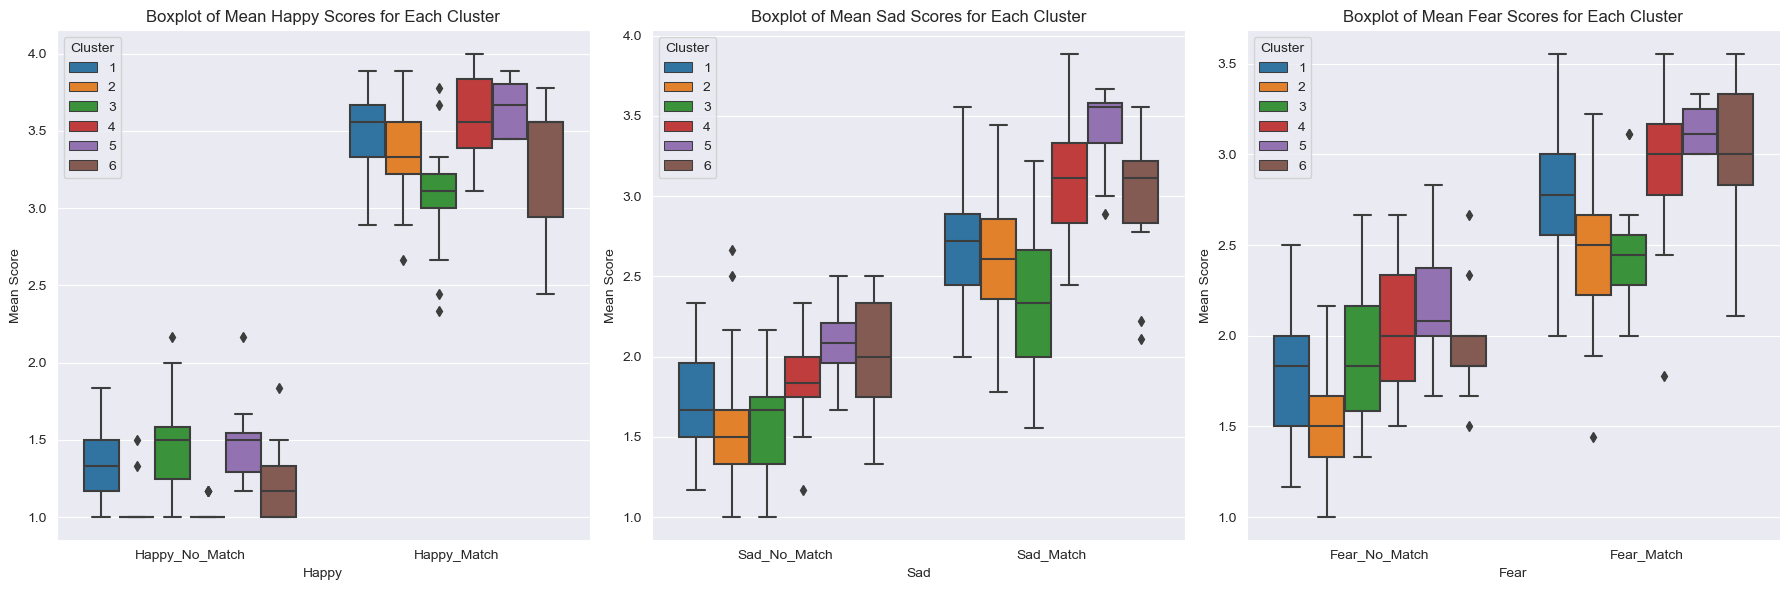

In [60]:
#Boxplots tasks
create_boxplots(data,cluster_data_average)


### Prediction on Rating0 differenciated by Match and Emotion on RETOS & BEBRASK using Moving Average Time Series


In [61]:
data = pd.read_excel("RETOS_BEBRASK_Rating0_Time_MA_Series.xlsx")
data

,Subject ID,Happy_0_MA_0,Happy_0_MA_1,Happy_0_MA_2,Happy_0_MA_3,Happy_1_MA_0,Happy_1_MA_1,Happy_1_MA_2,Happy_1_MA_3,Happy_1_MA_4,...,Fear_0_MA_1,Fear_0_MA_2,Fear_0_MA_3,Fear_1_MA_0,Fear_1_MA_1,Fear_1_MA_2,Fear_1_MA_3,Fear_1_MA_4,Fear_1_MA_5,Fear_1_MA_6
0,PREDWELL_RETOS-1001-1,2.000000,1.000000,1.000000,1.000000,4.000000,4.000000,3.666667,3.666667,3.666667,...,1.666667,1.000000,1.666667,2.666667,2.000000,2.666667,3.000000,3.333333,3.333333,3.333333
1,PREDWELL_RETOS-1002-1,1.666667,1.666667,1.666667,1.000000,3.666667,4.000000,4.000000,4.000000,3.666667,...,3.000000,2.333333,1.666667,2.333333,2.666667,3.333333,3.666667,3.000000,3.000000,3.000000
2,PREDWELL_RETOS-1003-1,1.000000,1.000000,1.000000,1.000000,3.333333,3.666667,3.666667,3.333333,3.000000,...,1.333333,1.666667,2.000000,2.333333,2.333333,2.333333,2.000000,1.666667,2.000000,2.333333
3,PREDWELL_RETOS-1004-1,1.666667,2.333333,2.666667,2.000000,2.333333,2.333333,1.333333,1.666667,2.333333,...,1.333333,2.333333,2.333333,3.000000,2.666667,2.333333,2.333333,2.666667,2.000000,2.000000
4,PREDWELL_RETOS-1005-1,1.000000,1.000000,1.333333,1.333333,3.666667,3.333333,3.666667,3.333333,3.666667,...,2.333333,3.000000,2.000000,2.000000,2.333333,2.666667,3.000000,3.333333,3.333333,3.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,PREDWELL_RETOS-5-1,1.666667,1.333333,1.000000,1.000000,3.666667,3.333333,3.000000,2.666667,3.333333,...,2.666667,2.000000,1.000000,2.000000,2.333333,3.333333,3.000000,3.333333,2.666667,2.333333
145,PREDWELL_RETOS-6-1,1.333333,1.333333,1.000000,1.000000,3.333333,2.666667,2.666667,2.666667,3.666667,...,2.666667,2.666667,2.000000,2.000000,2.666667,2.666667,3.000000,2.333333,3.000000,3.333333
146,PREDWELL_RETOS-7-1,1.000000,1.000000,1.000000,1.000000,3.000000,3.333333,3.000000,3.666667,3.333333,...,2.000000,1.666667,2.666667,2.333333,2.333333,3.333333,3.000000,3.000000,3.000000,3.000000
147,PREDWELL_RETOS-8-1,1.000000,1.000000,1.000000,1.000000,3.000000,2.333333,2.000000,2.666667,3.333333,...,3.000000,3.000000,2.666667,3.333333,3.333333,3.000000,3.000000,2.666667,2.333333,2.000000


In [62]:
temporal_happy_0 = data[["Subject ID","Happy_0_MA_0","Happy_0_MA_1","Happy_0_MA_2","Happy_0_MA_3"]]
temporal_happy_1 = data[["Subject ID","Happy_1_MA_0","Happy_1_MA_1","Happy_1_MA_2","Happy_1_MA_3","Happy_1_MA_4","Happy_1_MA_5","Happy_1_MA_6"]]
temporal_fear_0 = data[["Subject ID","Fear_0_MA_0","Fear_0_MA_1","Fear_0_MA_2","Fear_0_MA_3"]]
temporal_fear_1 = data[["Subject ID","Fear_1_MA_0","Fear_1_MA_1","Fear_1_MA_2","Fear_1_MA_3","Fear_1_MA_4","Fear_1_MA_5","Fear_1_MA_6"]]
temporal_sad_0 = data[["Subject ID","Sad_0_MA_0","Sad_0_MA_1","Sad_0_MA_2","Sad_0_MA_3"]]
temporal_sad_1 = data[["Subject ID","Sad_1_MA_0","Sad_1_MA_1","Sad_1_MA_2","Sad_1_MA_3","Sad_1_MA_4","Sad_1_MA_5","Sad_1_MA_6"]]

## Hierarchical Clustering using Dynamic Time Warping

#### Happy Match

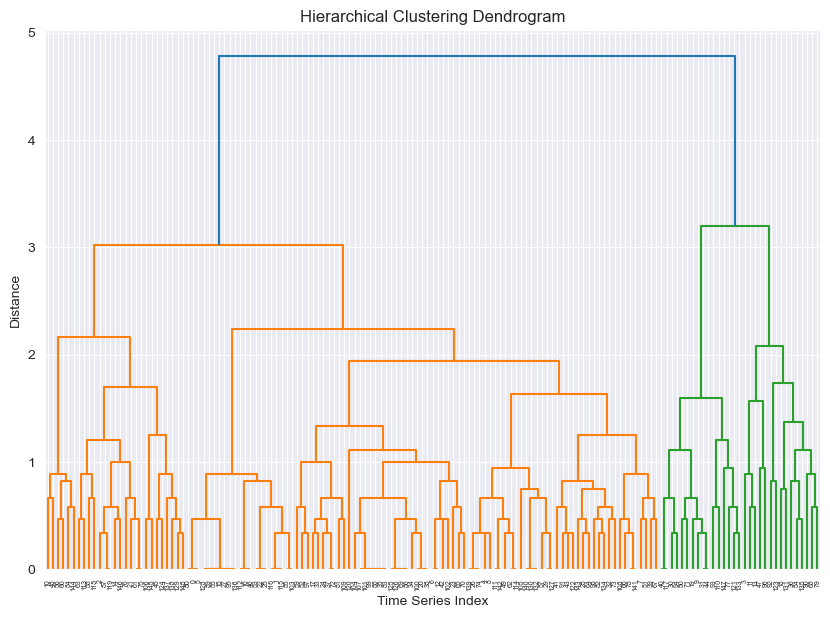

In [63]:
time_series_data = temporal_happy_1.drop(["Subject ID"], axis=1).to_numpy()
time_series_data = time_series_data.astype(np.float64)
# Convert distance_matrix to float, if it's not already

distance_matrix = dtw.distance_matrix_fast(time_series_data)

distance_matrix = distance_matrix.astype(np.float64)

condensed_dist_matrix = squareform(distance_matrix)
Z = linkage(condensed_dist_matrix, method='complete')

# Step 5: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Time Series Index')
plt.ylabel('Distance')
plt.show()

In [64]:
clusters_happy_match = fcluster(Z, 2, criterion='maxclust')


#### Happy Non Match

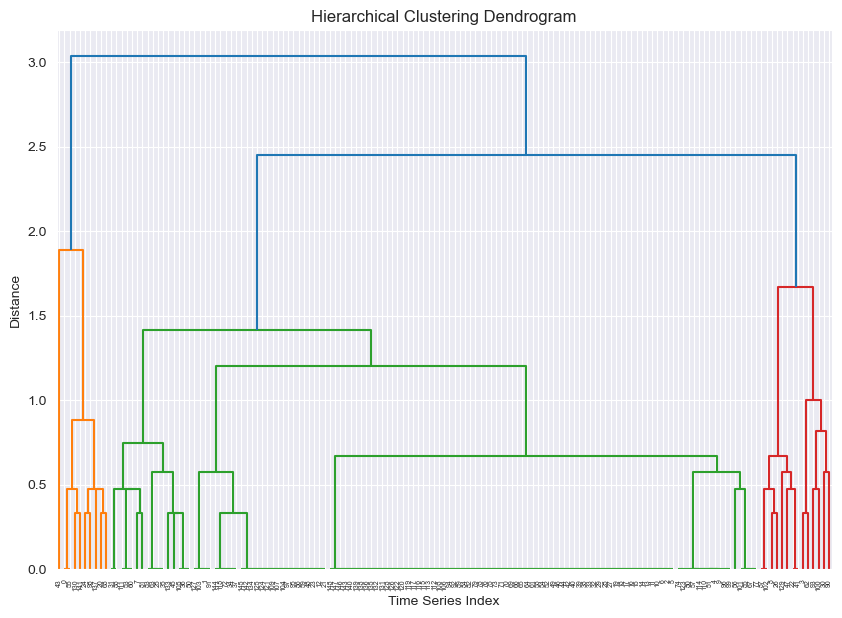

In [163]:
time_series_data = temporal_happy_0.drop(["Subject ID"], axis=1).to_numpy()
time_series_data = time_series_data.astype(np.float64)
# Convert distance_matrix to float, if it's not already

distance_matrix = dtw.distance_matrix_fast(time_series_data)

distance_matrix = distance_matrix.astype(np.float64)

condensed_dist_matrix = squareform(distance_matrix)
Z = linkage(condensed_dist_matrix, method='complete')

# Step 5: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Time Series Index')
plt.ylabel('Distance')
plt.show()


In [164]:
clusters_happy_non_match = fcluster(Z, 3, criterion='maxclust')

#### Fear Match

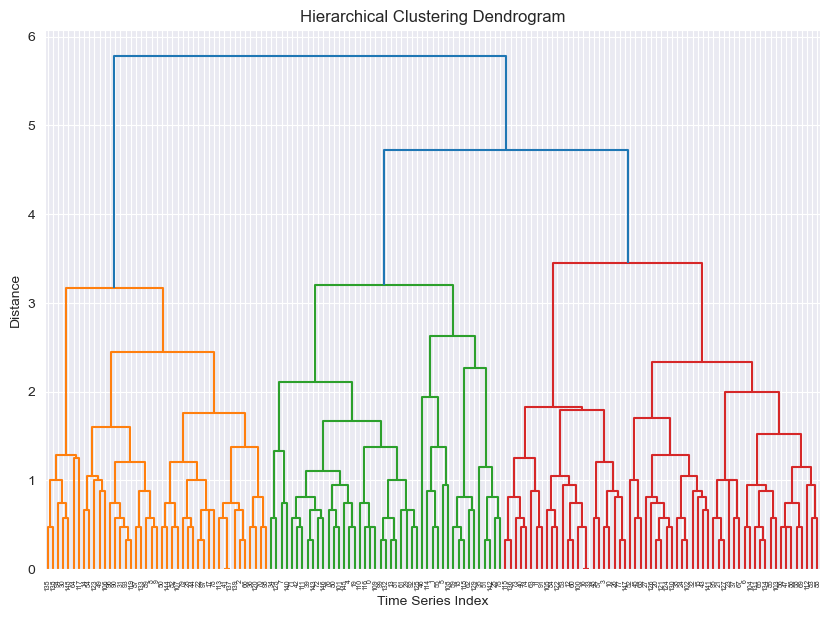

In [165]:
time_series_data = temporal_fear_1.drop(["Subject ID"], axis=1).to_numpy()
time_series_data = time_series_data.astype(np.float64)
# Convert distance_matrix to float, if it's not already

distance_matrix = dtw.distance_matrix_fast(time_series_data)

distance_matrix = distance_matrix.astype(np.float64)

condensed_dist_matrix = squareform(distance_matrix)
Z = linkage(condensed_dist_matrix, method='complete')

# Step 5: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Time Series Index')
plt.ylabel('Distance')
plt.show()


In [166]:
clusters_fear_match = fcluster(Z, 3, criterion='maxclust')


#### Fear Non Match


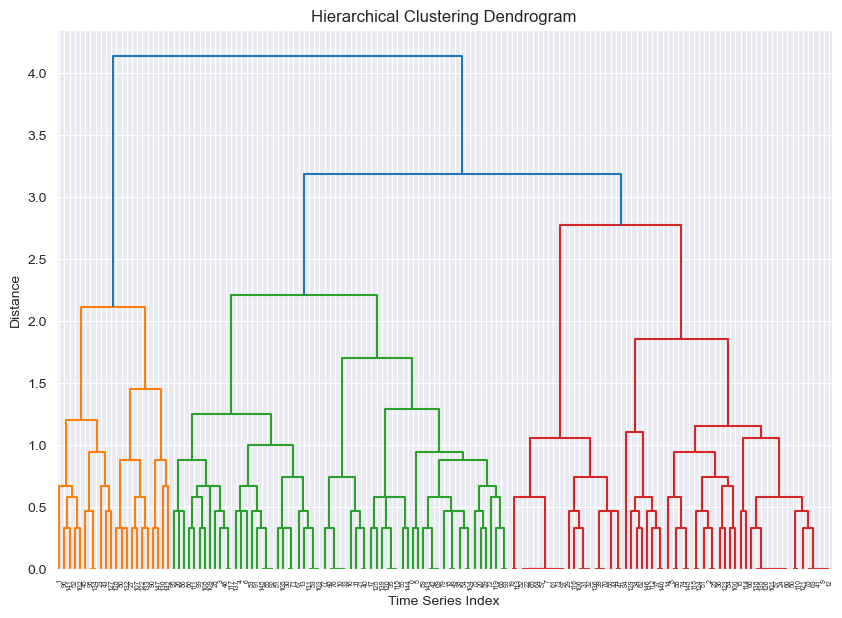

In [167]:
time_series_data = temporal_fear_0.drop(["Subject ID"], axis=1).to_numpy()
time_series_data = time_series_data.astype(np.float64)
# Convert distance_matrix to float, if it's not already

distance_matrix = dtw.distance_matrix_fast(time_series_data)

distance_matrix = distance_matrix.astype(np.float64)

condensed_dist_matrix = squareform(distance_matrix)
Z = linkage(condensed_dist_matrix, method='complete')

# Step 5: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Time Series Index')
plt.ylabel('Distance')
plt.show()



In [168]:
clusters_fear_no_match = fcluster(Z, 3, criterion='maxclust')

#### Sad Match

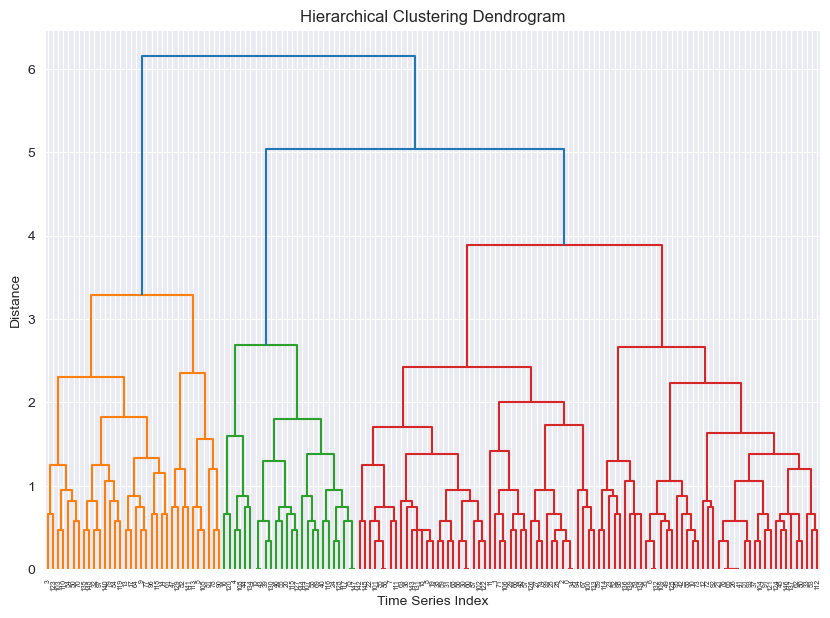

In [169]:
time_series_data = temporal_sad_1.drop(["Subject ID"], axis=1).to_numpy()
time_series_data = time_series_data.astype(np.float64)
# Convert distance_matrix to float, if it's not already

distance_matrix = dtw.distance_matrix_fast(time_series_data)

distance_matrix = distance_matrix.astype(np.float64)

condensed_dist_matrix = squareform(distance_matrix)
Z = linkage(condensed_dist_matrix, method='complete')

# Step 5: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Time Series Index')
plt.ylabel('Distance')
plt.show()

In [170]:
clusters_sad_match = fcluster(Z, 3, criterion='maxclust')


#### Sad No Match

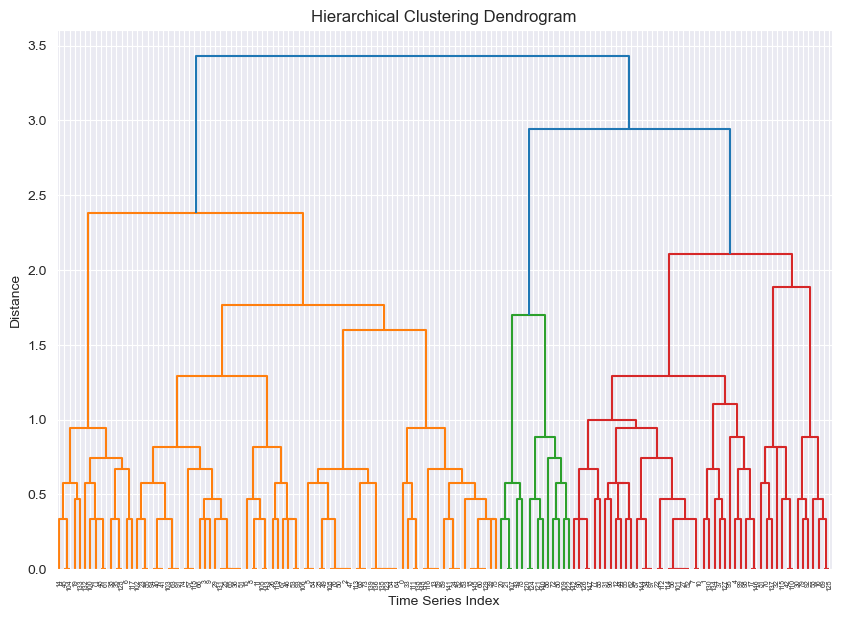

In [171]:
time_series_data = temporal_sad_0.drop(["Subject ID"], axis=1).to_numpy()
time_series_data = time_series_data.astype(np.float64)
# Convert distance_matrix to float, if it's not already

distance_matrix = dtw.distance_matrix_fast(time_series_data)

distance_matrix = distance_matrix.astype(np.float64)

condensed_dist_matrix = squareform(distance_matrix)
Z = linkage(condensed_dist_matrix, method='complete')

# Step 5: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Time Series Index')
plt.ylabel('Distance')
plt.show()

In [172]:
clusters_sad_no_match = fcluster(Z, 3, criterion='maxclust')